<a href="https://colab.research.google.com/github/Nghialego1306/test/blob/main/CNN_Doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/Colab_Notebooks/Data_Doan'
path_img = []
labels = ['banhbeo','banhbotloc','banhcom','banhmi','banhnam','banhtroinuoc','banhxeo','bunbo','comtam','pho']
x_train = []
y_train = []

In [ ]:
for i in labels:
  path_class = os.path.join(dir_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path_class):
    path_img = os.path.join(path_class,j)
    img = load_img(path_img,target_size=(32,64))
    img = img_to_array(img)
    img = img.astype('float32')
    img = img/255
    x_train.append(img)
    y_train.append(index_label)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train)

In [ ]:
# Initialize the CNN
model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,64,3)))
# A second convolution layer
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# Pooling
model.add(MaxPooling2D((2,2)))
# Flattening
model.add(Flatten())
# Full connection
model.add(Flatten())
model.add(Dense(1024,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(256,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation = 'softmax'))


In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15,batch_size=128,verbose=1)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 2.6246 - accuracy: 0.0877
Epoch 2/15
1/1 [==============================] - 1s 541ms/step - loss: 2.9481 - accuracy: 0.1228
Epoch 3/15
1/1 [==============================] - 0s 485ms/step - loss: 2.9794 - accuracy: 0.1930
Epoch 4/15
1/1 [==============================] - 1s 539ms/step - loss: 2.8153 - accuracy: 0.0877
Epoch 5/15
1/1 [==============================] - 1s 522ms/step - loss: 2.1201 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 1s 514ms/step - loss: 2.0700 - accuracy: 0.2982
Epoch 7/15
1/1 [==============================] - 1s 637ms/step - loss: 2.0598 - accuracy: 0.3860
Epoch 8/15
1/1 [==============================] - 1s 544ms/step - loss: 2.0219 - accuracy: 0.4035
Epoch 9/15
1/1 [==============================] - 1s 662ms/step - loss: 1.9457 - accuracy: 0.4737
Epoch 10/15
1/1 [==============================] - 1s 696ms/step - loss: 1.8330 - accuracy: 0.5088
Epoch 11/15
1/1 [=====

In [ ]:
model.save('food.h5')
model_pre=load_model('food.h5')

(1, 32, 64, 3)

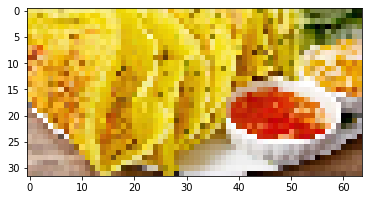

In [ ]:
img=load_img('/content/drive/MyDrive/Colab_Notebooks/Data_Doan/banhxeo/banhxeo_5.jpg',target_size=(32,64))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,64,3)
img=img.astype('float32')
img=img/255
img.shape

In [ ]:
np.argmax(model_pre.predict(img),axis=1)

array([6])